In [1]:
import numpy as np
import bilby 
import pycbc 
import sys
import matplotlib.pyplot as plt

import zuko
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn


/home/qian.hu/.conda/envs/myigwn-py39/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [2]:
import warnings


In [3]:
warnings.filterwarnings("ignore", "in-band")

In [4]:
import river.data
from river.data.datagenerator import DataGeneratorBilbyFD
from river.data.dataset import DatasetStrainFD
#import river.data.utils as datautils
from river.data.utils import *

from river.models import embedding
from river.models.utils import *
#from river.models.embedding.pca import project_strain_data_FDAPhi
from river.models.embedding.conv import EmbeddingConv1D, EmbeddingConv2D
from river.models.embedding.mlp import EmbeddingMLP1D

In [5]:
import pickle

In [6]:
from sklearn.decomposition import IncrementalPCA

In [7]:
import sklearn.decomposition 

In [8]:
Nsample = 3
injection_parameters_all = generate_BNS_injection_parameters(
        Nsample*2,
        a_max=0.1,
        d_min=10,
        d_max=200,
        d_power=2)


Nsample_template = 10
injection_parameters_template = generate_BNS_injection_parameters(
        Nsample_template,
        a_max=0.1,
        d_min=10,
        d_max=200,
        d_power=2)

In [9]:
source_type = 'BNS'
detector_names = ['H1', 'L1', 'V1'] 
duration = 32
f_low = 20
f_ref = 20
sampling_frequency = 2048
waveform_approximant = 'IMRPhenomPv2_NRTidal'
parameter_names = PARAMETER_NAMES_ALL_PRECESSINGBNS_BILBY
PSD_type = 'bilby_default' #'zero_noise' bilby_default
use_sealgw_detector = True

In [10]:
data_generator = DataGeneratorBilbyFD(source_type,
            detector_names, 
            duration, 
            f_low, 
            f_ref, 
            sampling_frequency, 
            waveform_approximant, 
            parameter_names,
            PSD_type=PSD_type,
            use_sealgw_detector=use_sealgw_detector)

data_generator_clean = DataGeneratorBilbyFD(source_type,
            detector_names, 
            duration, 
            f_low, 
            f_ref, 
            sampling_frequency, 
            waveform_approximant, 
            parameter_names,
            PSD_type='zero_noise',
            use_sealgw_detector=use_sealgw_detector)

'''
data_template_generator = DataGeneratorBilbyFD(source_type,
            detector_names, 
            duration, 
            f_low, 
            f_ref, 
            sampling_frequency, 
            waveform_approximant, 
            parameter_names,
            PSD_type='zero_noise',
            use_sealgw_detector=use_sealgw_detector)
'''

03:16 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
03:16 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


Using bilby_default PSDs to generate data.
Using zero_noise PSDs to generate data.


"\ndata_template_generator = DataGeneratorBilbyFD(source_type,\n            detector_names, \n            duration, \n            f_low, \n            f_ref, \n            sampling_frequency, \n            waveform_approximant, \n            parameter_names,\n            PSD_type='zero_noise',\n            use_sealgw_detector=use_sealgw_detector)\n"

In [11]:
data_generator.inject_signals(injection_parameters_all, 2*Nsample, Nsample)
data_generator_clean.inject_signals(injection_parameters_all, 2*Nsample, Nsample)
#data_template_generator.inject_signals(injection_parameters_template, Nsample_template)

Injecting 0-th signal, 0.0% done


03:16 bilby WARNING : The injected signal has a duration in-band of 165.5s, but the data for detector H1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 165.5s, but the data for detector L1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 165.5s, but the data for detector V1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 99.1s, but the data for detector H1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 99.1s, but the data for detector L1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 99.1s, but the data for detector V1 has a duration of 32s


Injecting 1-th signal, 16.67% done
SNR=6.99901534261237<8, this injection is not recorded.
Injecting 2-th signal, 33.33% done


03:16 bilby WARNING : The injected signal has a duration in-band of 114.7s, but the data for detector H1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 114.7s, but the data for detector L1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 114.7s, but the data for detector V1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 68.3s, but the data for detector H1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 68.3s, but the data for detector L1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 68.3s, but the data for detector V1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 165.5s, but the data for detector H1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 165.5s, but the data for detector L1 has a dur

Injecting 3-th signal, 50.0% done
Injecting 0-th signal, 0.0% done


03:16 bilby WARNING : The injected signal has a duration in-band of 165.5s, but the data for detector V1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 99.1s, but the data for detector H1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 99.1s, but the data for detector L1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 99.1s, but the data for detector V1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 114.7s, but the data for detector H1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 114.7s, but the data for detector L1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 114.7s, but the data for detector V1 has a duration of 32s


Injecting 1-th signal, 16.67% done
SNR=7.076294401072016<8, this injection is not recorded.
Injecting 2-th signal, 33.33% done
Injecting 3-th signal, 50.0% done


03:16 bilby WARNING : The injected signal has a duration in-band of 68.3s, but the data for detector H1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 68.3s, but the data for detector L1 has a duration of 32s
03:16 bilby WARNING : The injected signal has a duration in-band of 68.3s, but the data for detector V1 has a duration of 32s


In [12]:
data_generator.numpy_starins()
data_generator_clean.numpy_starins()
#data_template_generator.numpy_starins()
#data_generator.scale_strains()

data_generator.whiten_strains()
data_generator_clean.whiten_strains()
#data_template_generator.scale_strains()

In [13]:
freq = data_generator.data['farray']

In [14]:
#n_components=10
#ipca_gen = embedding.pca.IPCAGenerator(data_template_generator.data['strains'], n_components, detector_names, decomposition='exp_unwrap')

In [15]:
#modelutils.save_model('IPCAgenerator.pickle', ipca_gen)

In [16]:
ipca_gen = load_model('../scripts/ipca_models/IPCA_BNSFD_50000to1024_ExpUnwrap_fixtc_lowspin_200Mpc.pickle')

Model loaded from ../scripts/ipca_models/IPCA_BNSFD_50000to1024_ExpUnwrap_fixtc_lowspin_200Mpc.pickle


In [17]:
ipca_test_A = ipca_gen.pca_dict['H1']['amplitude']
ipca_test_phi = ipca_gen.pca_dict['H1']['phase']

In [45]:
data_test_asd = data_generator.data['PSDs']['H1'][0]**0.5 * 1e23

data_test_A = np.abs(data_generator.data['strains']['H1'])[0] 
data_test_phi = np.unwrap(np.angle(data_generator.data['strains']['H1'])[0] )


data_test_A_clean = np.abs(data_generator_clean.data['strains']['H1'])[0] 
data_test_phi_clean = np.unwrap(np.angle(data_generator_clean.data['strains']['H1'])[0] )


data_noise = data_generator.data['strains']['H1'][0] - data_generator_clean.data['strains']['H1'][0]
data_noise_A = np.abs(data_noise)
data_noise_phi = np.unwrap(np.angle(data_noise))

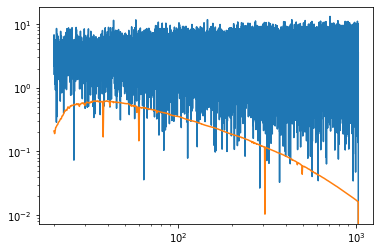

In [19]:
plt.loglog(freq, data_test_A, label='data')
plt.loglog(freq, data_test_A_clean, label='clean waveform')

In [46]:
projection_asd = np.dot(np.dot(data_test_asd, ipca_test_A.components_.T), ipca_test_A.components_)

projection_A = np.dot(np.dot(data_test_A, ipca_test_A.components_.T), ipca_test_A.components_)
projection_phi = np.dot(np.dot(data_test_phi, ipca_test_phi.components_.T), ipca_test_phi.components_)

projection_A_clean = np.dot(np.dot(data_test_A_clean, ipca_test_A.components_.T), ipca_test_A.components_)
projection_phi_clean = np.dot(np.dot(data_test_phi_clean, ipca_test_phi.components_.T), ipca_test_phi.components_)

projection_A_noise = np.dot(np.dot(data_noise_A, ipca_test_A.components_.T), ipca_test_A.components_)
projection_phi_noise = np.dot(np.dot(data_noise_phi, ipca_test_phi.components_.T), ipca_test_phi.components_)

In [48]:
projection_A_noise + projection_A_clean

array([1.73624498, 7.01032906, 4.58421615, ..., 4.07596194, 4.05024069,
       0.        ])

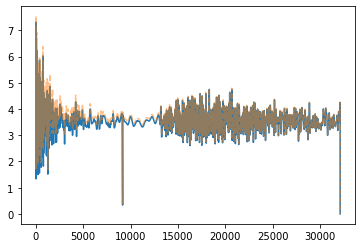

In [53]:
plt.plot(projection_A)
plt.plot(projection_A_noise + projection_A_clean, linestyle='--', alpha=0.5)

In [29]:
projection_asd = ipca_test_A.transform([data_test_asd])[0]

projection_A = np.dot(ipca_test_A.transform([data_test_A])[0], ipca_test_A.components_)
projection_phi = np.dot(ipca_test_phi.transform([data_test_phi])[0], ipca_test_phi.components_)

projection_A_clean = np.dot(ipca_test_A.transform([data_test_A_clean])[0], ipca_test_A.components_)
projection_phi_clean = np.dot(ipca_test_phi.transform([data_test_phi_clean])[0], ipca_test_phi.components_)

In [131]:
a = ipca_test_A.transform([data_test_A])

In [132]:
b = np.dot(data_test_A, ipca_test_A.components_.T)

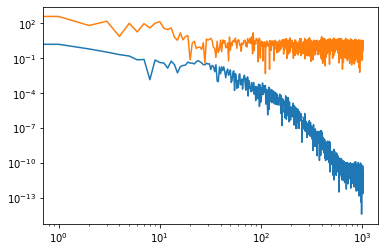

In [36]:
plt.loglog(abs(np.dot(data_test_A_clean, ipca_test_A.components_.T)))
plt.loglog(abs(np.dot(data_test_A, ipca_test_A.components_.T)))

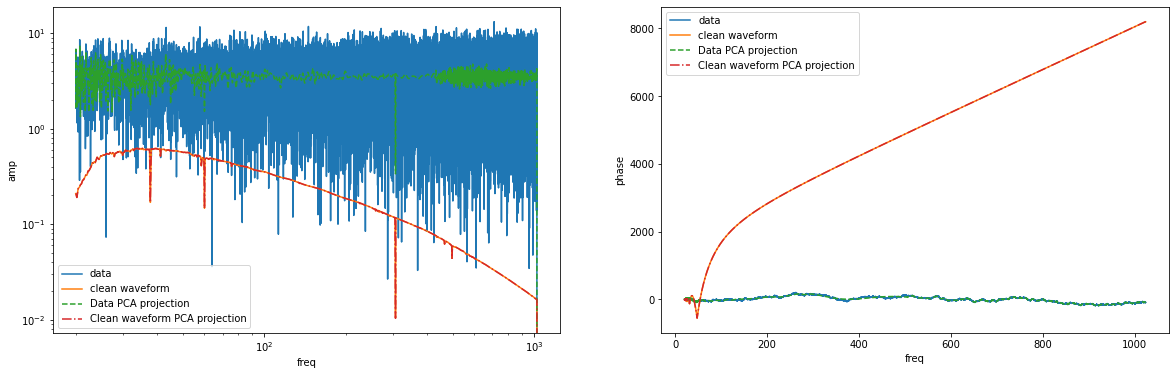

In [41]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.loglog(freq, projection_asd, label='asd')
plt.loglog(freq, data_test_A, label='data')
plt.loglog(freq, data_test_A_clean, label='clean waveform')
plt.loglog(freq, projection_A, label='Data PCA projection', linestyle='--')
plt.loglog(freq, projection_A_clean, label='Clean waveform PCA projection', linestyle='-.')
plt.xlabel('freq')
plt.ylabel('amp')
plt.legend()


plt.subplot(1,2,2)
plt.plot(freq, data_test_phi, label='data')
plt.plot(freq, data_test_phi_clean, label='clean waveform')
plt.plot(freq, projection_phi, label='Data PCA projection', linestyle='--')
plt.plot(freq, projection_phi_clean, label='Clean waveform PCA projection', linestyle='-.')
plt.xlabel('freq')
plt.ylabel('phase')
plt.legend()

plt.show()

In [15]:
#ipca_gen.pca_dict['H1']['phase'].singular_values_

In [16]:
ds = DatasetStrainFD(data_dict=data_generator.data, parameter_names=PARAMETER_NAMES_CONTEXT_PRECESSINGBNS_BILBY)

In [17]:
def get_condition_2proj(embedding_proj, embedding_noproj, theta, strain, psd, detector_names, ipca_gen, device, downsample_rate):
    inputs_proj = project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen).to(device)
    inputs_noproj = project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen, project=False, dim=2, downsample_rate=downsample_rate).to(device)
    theta = theta.to(device)

    embedding_out_proj = embedding_proj(inputs_proj)
    embedding_out_noproj = embedding_noproj(inputs_noproj)
    condition = torch.cat((embedding_out_proj, embedding_out_noproj), -1)

    return condition

In [18]:
device = 'cpu'
theta, strain, psd = ds[0:2]
downsample_rate= 4

inputs_proj = project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen)
inputs_noproj = project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen, dim=2, downsample_rate=downsample_rate)

In [19]:
inputs_proj.shape

torch.Size([2, 9, 500])

In [20]:
inputs_noproj.shape

torch.Size([2, 3, 3, 500])

In [21]:
config_embd_proj = {}
config_embd_proj['model'] = 'EmbeddingMLP1D'
config_embd_proj['ndet'] = 3
config_embd_proj['nout'] = 128
config_embd_proj['num_blocks'] = 3
config_embd_proj['datalength'] = 500
config_embd_proj['middle_features'] = 256

In [28]:
embedding_proj = EmbeddingMLP1D(ndet =3, nout= 128, num_blocks = 3, use_psd = True, middle_features = 128, datalength=inputs_proj.shape[-1])
#embedding_proj = get_model(config_embd_proj)
embedding_noproj = EmbeddingConv2D(ndet=3, nout=128, num_blocks=3, use_psd = True)

In [23]:
inputs_proj.shape[-1]

500

In [24]:
testdict = {}
testdict['ndet'] = 3
testdict['nout'] = 128
testdict['num_blocks'] = 5
testdict['middle_features'] = 500
#testdict['datalength'] = 200
testdict['wwdawd'] = 200

In [25]:
embedding_noproj(inputs_noproj).shape

torch.Size([2, 128])

In [26]:
embedding_proj(inputs_proj).shape

torch.Size([2, 128])

In [29]:
count_parameters(embedding_proj)

784640

In [35]:
testdict = {}
testdict['model'] = 'CouplingNSF'
testdict['n_inputs'] = 17 
testdict['n_transforms'] = 256
testdict['n_conditional_inputs'] = 256
testdict['n_neurons'] = 256
testdict['batch_norm_between_transforms'] = True

In [36]:
_ = testdict.pop('model')
aa = CouplingNSF(**testdict)

In [34]:
testdict

{'n_inputs': 17,
 'n_transforms': 256,
 'n_conditional_inputs': 256,
 'n_neurons': 256,
 'batch_norm_between_transforms': True}

In [29]:
from glasflow import RealNVP, CouplingNSF


In [21]:
inputs_proj.shape

torch.Size([2, 9, 500])

In [35]:
get_condition_2proj(embedding_proj, embedding_noproj, theta, strain, psd, detector_names, ipca_gen, device, downsample_rate).shape

torch.Size([2, 256])

In [40]:
device = 'cpu'
downsample_rate = 4
inputs_proj = project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen)#.to(device)
inputs_noproj = project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen, project=False,downsample_rate=4, dim=1)#.to(device)
theta = theta#.to(device)

In [36]:
inputs_proj.shape

torch.Size([2, 9, 500])

In [37]:
inputs_noproj.shape

torch.Size([2, 1, 9, 8033])

In [38]:
embedding_proj(inputs_proj).shape

torch.Size([2, 128])

In [41]:
embedding_noproj(inputs_noproj.unsqueeze(-2)).shape

torch.Size([2, 128])

In [ ]:
theta, strain, psd = ds[0:2]

In [ ]:
get_condition_2proj(embedding_proj, embedding_noproj, theta, strain, psd, detector_names, ipca_gen, device='cpu', downsample_rate=4)

In [ ]:
proj_angle = np.unwrap(np.angle(strain), axis=-1)


In [ ]:
proj_angle.shape

In [ ]:
proj_angle = np.unwrap(np.angle(strain), axis=-1)
plt.plot(proj_angle[0][0])
plt.plot(proj_angle[0][1])
plt.plot(proj_angle[0][2])

In [ ]:
np.array(list(data_dict['strains'].values()))

In [ ]:
def project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen):
    strain_amp = np.abs(strain)
    strain_phi = np.unwrap(np.angle(strain) , axis=-1)
    n_components = ipca_gen.n_components

    output_amp = []
    output_phi = []
    output_psd = []
    for i,detname in enumerate(detector_names):
        output_amp.append(ipca_gen.project(strain_amp[:,i,:], detname, 'amplitude'))
        output_phi.append(ipca_gen.project(strain_phi[:,i,:], detname, 'phase'))
        output_psd.append(ipca_gen.project(psd[:,i,:], detname, 'amplitude'))
    output_amp = torch.from_numpy(np.array(output_amp))
    output_phi = torch.from_numpy(np.array(output_phi))
    output_psd = torch.from_numpy(np.array(output_psd))

    return torch.cat((output_amp, output_phi, output_psd)).movedim(0,1).float()


In [ ]:
theta, strain, psd = ds[0:2]
psd.shape

In [ ]:
theta, strain, psd = ds[0:2]

detector_names = data_generator.detector_names
aa = project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen)

In [ ]:
aa.shape

In [ ]:
channel = 'strains'
detname = 'H1'
test_strain = np.abs(data_generator.data[channel][detname])


In [ ]:
test_strain[0]

In [ ]:
test_strain.shape

In [ ]:
ipca_gen.project(test_strain[0:3], detname, 'amplitude')

In [ ]:
bank_H1 = data_template_generator.data['strains']['H1'].copy()

In [ ]:
u,s,vt = np.linalg.svd(bank_H1.T, full_matrices=False)

In [ ]:
padding = 0
dialation = 1
kernel_size = 1
stride = 1


In [ ]:
int((256 + 2*padding - dialation*(kernel_size-1) - 1)/stride) + 1

In [ ]:
class EmbeddingConv(nn.Module):
    def __init__(self, ndet, ncomp, nout, use_psd = True):
        super().__init__()
        self.ncomp = ncomp
        self.nout = nout
        if use_psd:
            self.nchannel = 3*ndet # strains(2) + PSD (1)
        else:
            self.nchannel = 2*ndet

        self.middle_channel = 512
        self.cnn1 = nn.Sequential(
            nn.Conv1d(in_channels=self.nchannel, out_channels=self.middle_channel, kernel_size=1, stride=1),
            nn.BatchNorm1d(self.middle_channel),
            #nn.MaxPool1d(kernel_size=2)
        )
        
        self.cnn2 = nn.Sequential(
            nn.Conv1d(in_channels=self.middle_channel, out_channels=self.middle_channel, kernel_size=1, stride=1),
            nn.BatchNorm1d(self.middle_channel),
            #nn.MaxPool1d(kernel_size=2)
        )

        self.cnn3 = nn.Sequential(
            nn.Conv1d(in_channels=self.middle_channel, out_channels=self.middle_channel, kernel_size=1, stride=1),
            nn.BatchNorm1d(self.middle_channel),
            #nn.MaxPool1d(kernel_size=2)
        )
        self.dropout = nn.Dropout(0.5)
        self.linear = nn.Linear(self.middle_channel*self.ncomp, self.nout)


    def forward(self, x):
        # x : [batch_size, channel (det_123, amp/phase) = 2*ndet, length (number of samples)]
        bs,_,_  = x.shape 
        x = self.cnn1(x)
        x = self.cnn2(x)
        x = self.cnn3(x)
        x = self.dropout(x).reshape((bs,-1))
        output = self.linear(x)

        return output

In [ ]:
Net_emb = EmbeddingConv(ndet=3, ncomp=n_components, nout=128)

In [ ]:
theta, strain, psd = ds[0:2]
test_input = project_strain_data_FDAPhi(strain, psd, detector_names, ipca_gen)

In [ ]:
embedding_out = Net_emb(test_input)

In [ ]:
test_input.shape

In [ ]:
theta.shape

In [ ]:
flow = zuko.flows.NSF(features=17, context=128, transforms=3, hidden_features=(64, 64))


In [ ]:
loss = -flow(embedding_out).log_prob(theta).mean()

In [ ]:
loss